## Import Library

In [2]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import os

## Membaca Dataset

In [3]:
df = pd.read_csv("dataset\stroke.csv")
print("Dataset Loaded!")
df = df.drop("id", axis=1)
df.head()

Dataset Loaded!


<>:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\Bagas\AppData\Local\Temp\ipykernel_9780\2984943672.py:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df = pd.read_csv("dataset\stroke.csv")


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Cek Tipe Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Jumlah Kolom yg Kosong

In [5]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Drop Kolom Not a Number

In [6]:
df = df.dropna()
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Setelah Evaluasi Drop Data NaN

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


## Jumlah Class / Target

In [8]:
df["stroke"].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

## Var Independen & Dependen

In [9]:
x = df.drop("stroke", axis=1)
y = df.iloc[:, -1]


y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [10]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


## Split Data Test & Train

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Generate Model Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in x_train.columns:
    if x_train[col].dtype == "object":
        le = LabelEncoder()

        # Fit TRAIN
        x_train[col] = le.fit_transform(x_train[col])

        # Test TRANSFORM
        x_test[col] = le.transform(x_test[col])

        encoders[col] = le


# Encoder untuk API
fitur_train = x_train.columns.tolist()

with open("models/encoders.pkl", "wb") as f:
    pickle.dump({"columns": fitur_train, "encoders": encoders}, f)

print("\nEncoder berhasil disimpan!")



Encoder berhasil disimpan!


In [13]:
from imblearn.combine import SMOTEENN
x_train_res, y_train_res = SMOTEENN().fit_resample(x_train, y_train)


In [14]:
y_test

4020    0
2170    0
2822    0
4759    0
1437    0
       ..
2819    0
1478    0
3704    0
762     0
5068    0
Name: stroke, Length: 982, dtype: int64

In [15]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1473,1,49.0,1,0,1,0,1,139.43,40.2,1
4539,0,63.0,0,0,1,3,0,203.87,26.4,2
953,1,6.0,0,0,0,4,0,92.98,18.9,0
2563,1,57.0,0,0,1,2,1,90.40,26.5,2
2426,0,7.0,0,0,0,4,1,79.58,15.5,0


In [16]:
x_train_res

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,63.000000,0,0,1,3,0,203.870000,26.400000,2
1,1,6.000000,0,0,0,4,0,92.980000,18.900000,0
2,0,7.000000,0,0,0,4,1,79.580000,15.500000,0
3,0,76.000000,0,0,1,2,0,97.900000,31.300000,1
4,0,65.000000,0,0,1,0,1,84.470000,52.700000,3
...,...,...,...,...,...,...,...,...,...,...
6371,0,77.573396,0,0,1,2,0,79.499106,29.471560,1
6372,0,70.549203,0,0,1,3,1,76.604880,27.117620,2
6373,0,79.085520,0,0,0,0,0,98.541672,22.402624,1
6374,0,80.970503,0,0,1,2,0,78.587912,19.482591,0


## Training

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_res, y_train_res)

print("Training selesai!")

Training selesai!


## Evaluasi


EVALUASI MODEL RANDOMFOREST
Akurasi: 0.8513238289205702

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       940
           1       0.12      0.38      0.18        42

    accuracy                           0.85       982
   macro avg       0.54      0.63      0.55       982
weighted avg       0.93      0.85      0.89       982



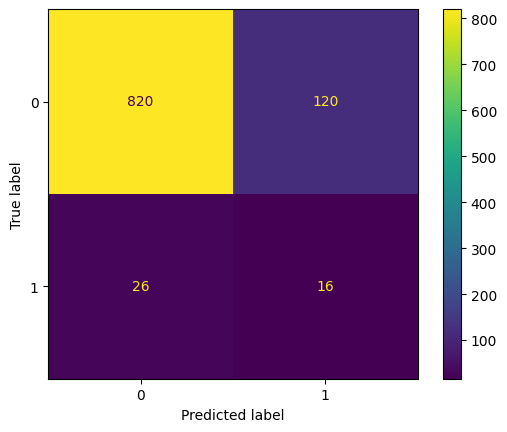

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(x_test)

print("\nEVALUASI MODEL RANDOMFOREST")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


## Simpan Evaluasi JSON

In [19]:
import json

evaluation_result = {
    "model": "XGBoost",
    "accuracy": accuracy_score(y_test, y_pred)
}

# Simpan ke file JSON
with open("forest.json", "w") as f:
    json.dump(evaluation_result, f, indent=4)

print("\nHasil evaluasi disimpan ke forest.json")


Hasil evaluasi disimpan ke forest.json


## Simpan Model

In [20]:

with open('models/random_forest.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("model dan scaler berhasil disimpan")

model dan scaler berhasil disimpan
